**5) Data Analytics II**
1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,ConfusionMatrixDisplay

In [16]:
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [17]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [18]:
x.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
predicted = model.predict(x_test)
predicted

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [23]:
precision_score(y_true=y_test, y_pred=predicted)

0.7692307692307693

In [25]:
acc = accuracy_score(y_true=y_test, y_pred=predicted)
acc

0.875

In [26]:
error_rate = 1 - acc
error_rate

0.125

In [28]:
cm = confusion_matrix(y_test, predicted)
cm

array([[25,  3],
       [ 2, 10]], dtype=int64)

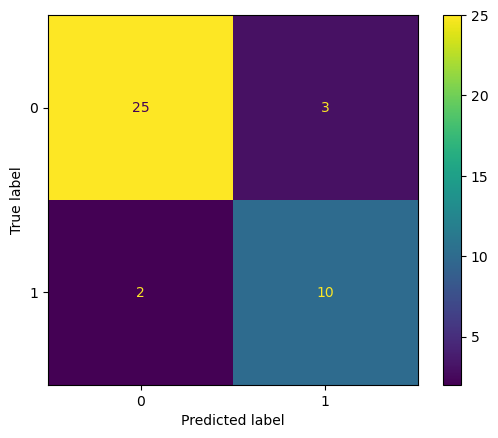

In [30]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()